* __INSULT__ - оскорблять, обижать
* __OBSCENITY__ - ругательство, неприличное слово
* __THREAT__ - угроза

In [1]:
import numpy as np
import pandas as pd

In [6]:
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)

__load data__

In [7]:
data = pd.read_csv('data.txt', delimiter="\t", header=None, names=["code", "text"])
data.head()

,code,text
0,41127,дворника надо тоже уничтожить!
1,6812,"моя старшая неделю шипела, не принимала подкидыша, которого я принесла. китя такой славный, потерпите немного, мои т..."
2,6256,полностью с вами согласна!
3,189636,"хоть ногу вверх, ничего не изменится"
4,99053,а что значит - левого ребенка?


In [8]:
print(f"data.txt shape = {data.shape[0]} rows, {data.shape[1]} cols")

data.txt shape = 248290 rows, 2 cols


__load test__

In [74]:
test = pd.read_csv('test.txt', delimiter="\t", header=None, names=["code"])
test = pd.merge(test, data, on='code', how='inner')
test.head(20)

,code,text
0,167315,какая прелесть!!!😍
1,224546,каал какой не с кровью?
2,241309,гнойные пидоры аллы они
3,31170,чё ты губы шлёшь в помаде?фу блядь
4,173358,матрона помогает реально это правда. сама к ней ездила. надо верить
5,44762,всяко место пусто не бывает и ск денег он пустил на чечню что ж не нахваливать друг друга
6,109556,вот это чудо!!!
7,102641,во всех своих интервью не устает повторять что является однопартийцем губернатора... уважает его и мнение народа изб...
8,12075,ты мне во сне снился:) 🤷:$
9,139899,"да макаревич , как я уважал тебя , как любил твои песни и группу машина времени ! . просто удивляюсь , как за послед..."


In [14]:
print(f"test.txt shape = {test.shape[0]} rows, {test.shape[1]} cols")

test.txt shape = 99515 rows, 1 cols


__load train__

In [26]:
f = open('train.txt', encoding='utf-8')
a = np.zeros((data.shape[0], 5))
i = 0
for line in f:
    if line.find('__label__NORMAL')>-1:
        a[i, 1] = 1
    if line.find('__label__INSULT')>-1:
        a[i, 2] = 1   
    if line.find('__label__OBSCENITY')>-1:
        a[i, 2] = 1 
    if line.find('__label__THREAT')>-1:
        a[i, 4] = 1
    a[i,0] = int(line.split("\t")[0])
    i = i+1

print(a)

[[4.1127e+04 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00]
 [6.8120e+03 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [6.2560e+03 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]]


In [43]:
train = pd.DataFrame(data=a, columns=['code','normal','insult','obscenity','threat'])
train['code'] = train['code'].astype(int)
print(train.shape)
train = train[train['code']!=0]
print(train.shape)
train = pd.merge(train, data, on='code', how='inner')
train.tail(5)

(248290, 5)
(148774, 5)


,code,normal,insult,obscenity,threat,text
148769,99767,1.0,0.0,0.0,0.0,"а вы думаете что полиция об этом не знает, просто этим никто не хочет заниматься. я живу рядом с гагаринской полицие..."
148770,87456,1.0,0.0,0.0,0.0,"ну а что вы тут возмущаетесь , все ведь точно , по факту ."
148771,185614,1.0,0.0,0.0,0.0,затерли до дыр данный ролик сколько лет ему уже и все показывают каждый год по несколько раз разные группы.
148772,86412,0.0,1.0,0.0,0.0,если проследят за пидором то накажут
148773,205906,0.0,1.0,0.0,0.0,редкий долбоёб


https://colab.research.google.com/drive/1d21k1Yl8aF2z6ZGTwjECVKpwZJVD456T?usp=sharing#scrollTo=fN251ib04idq

In [40]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Dropout, LSTM, Bidirectional, SpatialDropout1D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [44]:
# Максимальное количество слов 
num_words = 10000
# Максимальная длина комментария
max_comment_len = 50

In [46]:
comments = train['text']
comments[:5]

0                                                                                             дворника надо тоже уничтожить!
1    моя старшая неделю шипела, не принимала подкидыша, которого я принесла. китя такой славный, потерпите немного, мои т...
2                                                                                                 полностью с вами согласна!
3                                                                                       хоть ногу вверх, ничего не изменится
4                                                                                             а что значит - левого ребенка?
Name: text, dtype: object

In [47]:
y_train = train[['normal','insult','obscenity','threat']]
y_train

,normal,insult,obscenity,threat
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
148769,1.0,0.0,0.0,0.0
148770,1.0,0.0,0.0,0.0
148771,1.0,0.0,0.0,0.0
148772,0.0,1.0,0.0,0.0


In [48]:
tokenizer = Tokenizer(num_words=num_words)

In [49]:
tokenizer.fit_on_texts(comments)

In [50]:
tokenizer.word_index

{'и': 1,
 'не': 2,
 'в': 3,
 'а': 4,
 'на': 5,
 'что': 6,
 'с': 7,
 'это': 8,
 'я': 9,
 'как': 10,
 'у': 11,
 'за': 12,
 'то': 13,
 'по': 14,
 'все': 15,
 'так': 16,
 'ты': 17,
 'вы': 18,
 'бы': 19,
 'но': 20,
 'да': 21,
 'надо': 22,
 'только': 23,
 'о': 24,
 'если': 25,
 'он': 26,
 'кто': 27,
 'вот': 28,
 'же': 29,
 'есть': 30,
 'от': 31,
 'к': 32,
 'очень': 33,
 'нет': 34,
 'для': 35,
 'уже': 36,
 'они': 37,
 'мне': 38,
 'его': 39,
 'из': 40,
 'будет': 41,
 'или': 42,
 'вам': 43,
 'можно': 44,
 'мы': 45,
 'было': 46,
 'где': 47,
 'их': 48,
 'меня': 49,
 'нас': 50,
 'когда': 51,
 'просто': 52,
 'до': 53,
 'ну': 54,
 'тоже': 55,
 'вас': 56,
 'там': 57,
 'спасибо': 58,
 'ещё': 59,
 'всё': 60,
 'тебя': 61,
 'она': 62,
 'тебе': 63,
 'без': 64,
 'может': 65,
 'ни': 66,
 'всех': 67,
 'всем': 68,
 'здоровья': 69,
 'люди': 70,
 'сейчас': 71,
 'сколько': 72,
 'лет': 73,
 'даже': 74,
 'чтобы': 75,
 'd': 76,
 'еще': 77,
 'нужно': 78,
 'б': 79,
 'чем': 80,
 'пусть': 81,
 'такой': 82,
 'какой': 83

In [51]:
sequences = tokenizer.texts_to_sequences(comments)

In [52]:
index = 1
print(comments[index])
print(sequences[index])

моя старшая неделю шипела, не принимала подкидыша, которого я принесла. китя такой славный, потерпите немного, мои теперь душа в душу живут, ваша примет попозже. а котенок необыкновенно красивый.
[219, 702, 2, 1146, 9, 8518, 82, 6485, 484, 247, 134, 834, 3, 1133, 381, 869, 6047, 4, 3472, 8519, 586]


In [55]:
tokenizer.word_index['неделю']

702

In [56]:
x_train = pad_sequences(sequences, maxlen=max_comment_len)

In [57]:
x_train[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,   22,   55, 2126],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,  219,  702,    2, 1146,
           9, 8518,   82, 6485,  484,  247,  134,  834,    3, 1133,  381,
         869, 6047,    4, 3472, 8519,  586],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  6

In [58]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 128, input_length=max_comment_len))
model_lstm.add(SpatialDropout1D(0.5))
model_lstm.add(LSTM(40, return_sequences=True))
model_lstm.add(LSTM(40))
model_lstm.add(Dense(4, activation='sigmoid'))

In [59]:
model_lstm.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy', 'AUC'])

In [60]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 128)           1280000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50, 40)            27040     
_________________________________________________________________
lstm_1 (LSTM)                (None, 40)                12960     
_________________________________________________________________
dense (Dense)                (None, 4)                 164       
Total params: 1,320,164
Trainable params: 1,320,164
Non-trainable params: 0
_________________________________________________________________


In [61]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [62]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=5,
                              batch_size=512,
                              validation_split=0.2,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/5
233/233 [==============================] - ETA: 0s - loss: 0.2816 - accuracy: 0.8213 - auc: 0.9326
Epoch 00001: val_accuracy improved from -inf to 0.89783, saving model to best_model_lstm.h5
233/233 [==============================] - 67s 286ms/step - loss: 0.2816 - accuracy: 0.8213 - auc: 0.9326 - val_loss: 0.1657 - val_accuracy: 0.8978 - val_auc: 0.9804
Epoch 2/5
233/233 [==============================] - ETA: 0s - loss: 0.1229 - accuracy: 0.9275 - auc: 0.9872
Epoch 00002: val_accuracy improved from 0.89783 to 0.93527, saving model to best_model_lstm.h5
233/233 [==============================] - 60s 257ms/step - loss: 0.1229 - accuracy: 0.9275 - auc: 0.9872 - val_loss: 0.1124 - val_accuracy: 0.9353 - val_auc: 0.9891
Epoch 3/5
233/233 [==============================] - ETA: 0s - loss: 0.1045 - accuracy: 0.9388 - auc: 0.9906
Epoch 00003: val_accuracy improved from 0.93527 to 0.93759, saving model to best_model_lstm.h5
233/233 [==============================] - 61s 263ms/step -

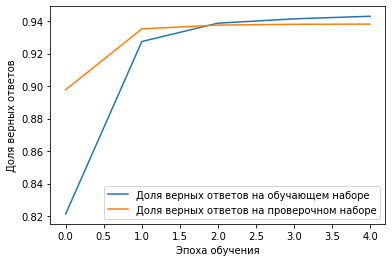

In [63]:
plt.plot(history_lstm.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Пробуем классифицировать комментарии
['normal','insult','obscenity','threat']

In [65]:
 comment = "чё ты губы шлёшь в помаде?фу блядь"

In [66]:
sequence = tokenizer.texts_to_sequences([comment])

In [67]:
data1 = pad_sequences(sequence, maxlen=max_comment_len)

In [68]:
data1

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         560,   17, 3547,    3, 1386,  378]])

In [70]:
result = model_lstm.predict(data1)
result

array([[2.1701157e-02, 8.8141984e-01, 6.8023801e-04, 3.7980661e-01]],
      dtype=float32)

In [72]:
comment2 = "матрона помогает реально это правда. сама к ней ездила. надо верить"
sequence2 = tokenizer.texts_to_sequences([comment2])
data2 = pad_sequences(sequence2, maxlen=max_comment_len)
result = model_lstm.predict(data2)
result

array([[9.9173111e-01, 9.8677576e-03, 2.5454164e-04, 1.8420815e-03]],
      dtype=float32)

In [75]:
saved_model_path = model_lstm.save(file path="./saved_models", save_format="tf")

SyntaxError: invalid syntax (<ipython-input-75-6af2ee7f970f>, line 1)

In [76]:
type(model_lstm)

tensorflow.python.keras.engine.sequential.Sequential

In [78]:
# Fetch the Keras session and save the model
# The signature definition is defined by the input and output tensors,
# and stored with the default serving key
import tempfile
import os

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model_lstm,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')


export_path = C:\Users\sych_\AppData\Local\Temp\1

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\sych_\AppData\Local\Temp\1\assets

Saved model:


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [79]:
model2 = tf.saved_model.load(export_dir=export_path)

In [80]:
type(model2)

tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject